<a href="https://colab.research.google.com/github/Nwosu-Ihueze/fb_prophet/blob/main/Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mounting google collab
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/time_series/

/content/drive/MyDrive/time_series


In [ ]:
#importing libraries
import numpy as np 
from scipy.stats import randint
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [ ]:
#Loading datasets
hpc = pd.read_csv('household_power_consumption.txt', sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

In [ ]:
#First 10
hpc.head(10)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
2006-12-16 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
2006-12-16 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
2006-12-16 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0


In [ ]:
#Statistical information
hpc.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [ ]:
#General information
hpc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [ ]:
#Checking for null values
hpc.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [ ]:
#Forward filling null values
for j in range(0,7):        
        hpc.iloc[:,j]=hpc.iloc[:,j].fillna(hpc.mean())

In [ ]:
#Creating sub metering 4
hpc['Sub_metering_4'] = (hpc['Global_active_power']* 1000/60) - hpc['Sub_metering_1'] - hpc['Sub_metering_2'] - hpc['Sub_metering_3']

In [ ]:
#First 5
hpc.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
dt,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [ ]:
#Resampling
hpc_daily = hpc.resample('D').sum()

In [ ]:
#Shape
hpc_daily.shape

(1442, 8)

In [ ]:
#Resetting index
hpc_index = hpc_daily.reset_index()

In [ ]:
#Renaming columns
hpc_index = hpc_index.rename(columns= {'dt': 'ds', 'Global_active_power':'y'})
hpc_index.head()

,ds,y,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.933333
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,36946.666667
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,19028.433333
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,13131.900000
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,20384.800000


In [ ]:
#splitting dataset
train_x = hpc_index[(hpc_index['ds']>='2006-12-16') & (hpc_index['ds']<='2009-11-26')]
test_x = hpc_index[(hpc_index['ds']>'2009-11-26')]

In [ ]:
#importing prophet model
from fbprophet import Prophet

In [ ]:
#Instatntiate model
model = Prophet()
#Train
model.fit(train_x)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#Prediction
y_pred = model.make_future_dataframe(periods=365)
forecast = model.predict(test_x)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2009-11-27,2094.127236,1533.566269,2629.619982
1,2009-11-28,2375.438023,1806.311500,2960.904926
2,2009-11-29,2347.200063,1770.435394,2906.727436
3,2009-11-30,1958.389137,1384.541848,2551.336679
4,2009-12-01,2087.380242,1522.429556,2618.583792
...,...,...,...,...
360,2010-11-22,2008.177595,1481.346352,2564.642666
361,2010-11-23,2158.501330,1587.463059,2760.921891
362,2010-11-24,2167.889515,1626.706080,2768.034561
363,2010-11-25,1993.666055,1431.203483,2562.429798


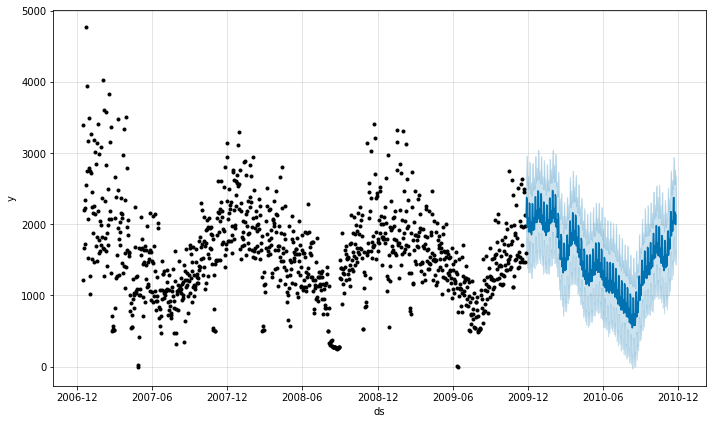

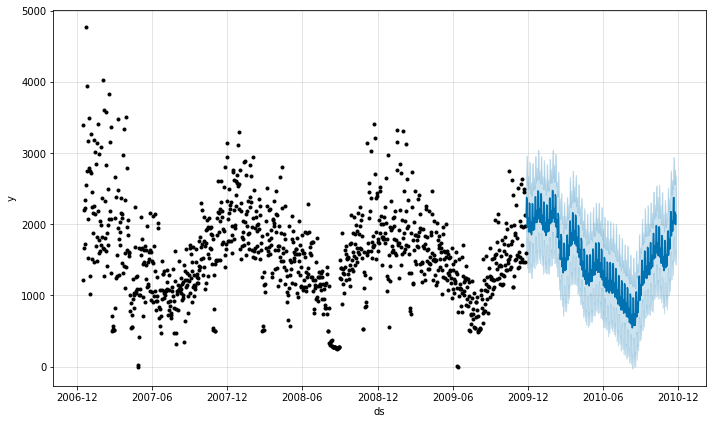

In [ ]:
#Plotting
model.plot(forecast)

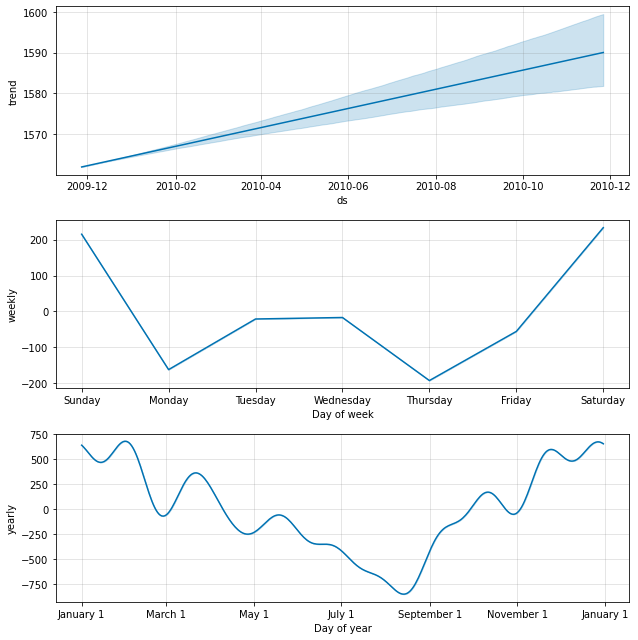

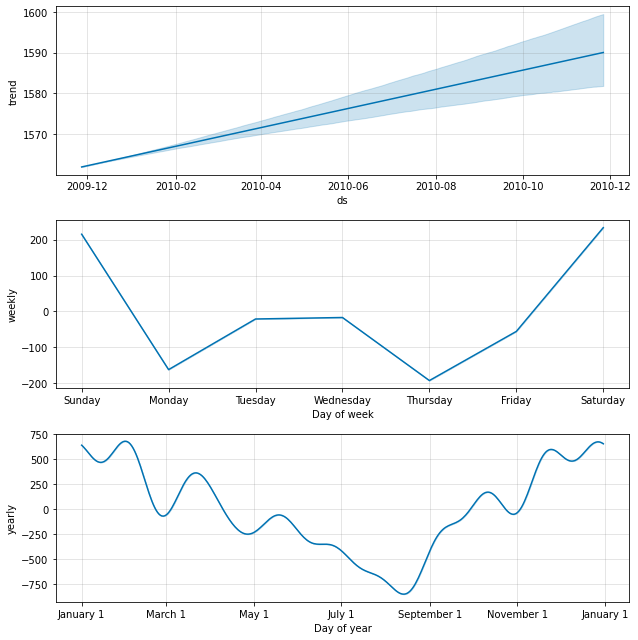

In [ ]:
model.plot_components(forecast)

In [ ]:
# calculate MAE between expected and predicted values for december
y_true = hpc_index['y'][-365:].values
y_pred1 = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred1)
print('MAE: %.3f' % mae)

MAE: 312.261


In [ ]:
# calculate MSE between expected and predicted values for december
y_true = hpc_index['y'][-365:].values
y_pred1 = forecast['yhat'].values
mse = mean_squared_error(y_true, y_pred1)
print('MAE: %.3f' % mae)

MAE: 312.261


In [ ]:
# calculate MAPE between expected and predicted values for december
y_true = hpc_index['y'][-365:].values
y_pred1 = forecast['yhat'].values
mape = np.mean(np.abs((y_true - y_pred1 /y_true))) *100
print('MAPE: %.3f' % mae)

MAPE: 312.261


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in true_divide

